In [107]:
import glob
import pandas as pd
import seaborn as sns
import yaml
import numpy as np
import pandas as pd
import seaborn as sns
import glob, os
import matplotlib.pyplot as plt
from matplotlib import colormaps
import statistics

In [108]:
# go through all files, and collect the best times and the opt times

file_list = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results_1310k/*/*/*.csv')
#file_list = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results_175k/*/*/*.csv')

dict_overview_best_time = {}

dict_overview_opt_time = {}

for file in file_list:

    env = file.split("/")[-1].split("\\")[-3]
    algo = file.split("\\")[-2]


    # the names of the transfer algos depend on the excluded environments.
    if "open_box" in algo : 
         if "transfer_exc" in algo : 
            algo = "open_box_transfer_exc"

    if "open_box" in algo : 
        if "transfer_all" in algo : 
            algo = "open_box_transfer_all"


    
    if "zero_shot_transfer_exc" in algo : 
        algo = "zero_shot_transfer_exc"

    if "zero_shot_transfer_all" in algo : 
        algo = "zero_shot_transfer_all"


    if "quantile_transfer_exc" in algo : 
        algo = "quantile_transfer_exc"

    if "quantile_transfer_all" in algo : 
        algo = "quantile_transfer_all"

    #print(env)
    #print(algo)

    df = pd.read_csv(file)

    #remove runs with too few iterations
    if len(df['time']) < 10:
        continue

    df = df[df['time'] > 0]

    # for comparibility, take the first 24 iteration for all optimization runs
    df = df.head(24)



    # sometimes there are marginal improvments late in the optimization run.
    # this would worsen the optimization time by alot, while barely improving the best time
    # the mitigate this, we take the first time that is within a certain threshold of the overall best time

    
    best_time_found = df['time'].min()

    threshold = best_time_found * 1.05 # 2 percent
    
    first_within_threshold_index = df[df['time'] <= threshold].index[0] # first time within threshold
    
    first_within_threshold_time = df.loc[first_within_threshold_index, 'time']

    #time_till_best_time_found = df['seconds_since_start_of_opt_run'][first_within_threshold_index]
    
    time_till_best_time_found = first_within_threshold_index +1 # index 0 is after 1 iteration, os add 1
    
    best_time_found = first_within_threshold_index
    
    
    #best_time_found = df['time'].min()
    
    #best_time_index = df['time'].idxmin()
    
    #time_till_best_time_found = df['seconds_since_start_of_opt_run'][best_time_index]


    

    #print(best_time_found)
    #print(best_time_index)
    #print(time_till_best_time_found)

    if algo not in dict_overview_best_time.keys() :
        dict_overview_best_time[algo] = {}
    if env not in dict_overview_best_time[algo].keys(): 
        dict_overview_best_time[algo][env] = []

    if algo not in dict_overview_opt_time.keys() :
        dict_overview_opt_time[algo] = {}
    if env not in dict_overview_opt_time[algo].keys(): 
        dict_overview_opt_time[algo][env] = []

    dict_overview_best_time[algo][env].append(float(best_time_found))
    dict_overview_opt_time[algo][env].append(float(time_till_best_time_found))



print("Best_Times_Overview")
#print(yaml.dump(dict_overview_best_time))

print("\n\n\n\nOpt_Times_Overview")
#print(yaml.dump(dict_overview_opt_time))
    

Best_Times_Overview




Opt_Times_Overview


In [109]:
# average all best times and all opt times


environments_list = ["S16_C16_N1000", "S16_C8_N100", "S8_C1_N50", "S16_C16_N10000", "S16_C4_N10", "S8_C8_N500", "S2_C2_N20", "S16_C1_N1000", "S16_C1_N10"]

algos_list = ["random_search_syne_tune", 
              "bayesian_open_box", "bayesian_syne_tune", 
              "open_box_transfer_exc", "open_box_transfer_all",
              "zero_shot_transfer_exc","zero_shot_transfer_all",
             "quantile_transfer_exc","quantile_transfer_all"]

dict_best_times_avg = {}

for algo in algos_list:

    if algo in dict_overview_best_time.keys():

        for environment in environments_list:

            if environment in dict_overview_best_time[algo].keys():

                if algo not in dict_best_times_avg.keys() :
                    print(f"adding {algo} as key to dict")
                    dict_best_times_avg[algo] = []
                
                dict_best_times_avg[algo].append(statistics.mean(dict_overview_best_time[algo][environment]))
            
            else:

                if algo not in dict_best_times_avg.keys() :
                    dict_best_times_avg[algo] = []
                
                dict_best_times_avg[algo].append(0)
    else:
        dict_best_times_avg[algo] = [0,0,0,0,0,0,0,0,0]


#print(yaml.dump(dict_best_times_avg))


dict_opt_times_avg = {}

for algo in algos_list:

    if algo in dict_overview_best_time.keys():

        for environment in environments_list:

            if environment in dict_overview_opt_time[algo].keys():

                if algo not in dict_opt_times_avg.keys() :
                    dict_opt_times_avg[algo] = []
                
                dict_opt_times_avg[algo].append(statistics.mean(dict_overview_opt_time[algo][environment]))
            
            else:
                if algo not in dict_opt_times_avg.keys() :
                    dict_opt_times_avg[algo] = []
                    
                dict_opt_times_avg[algo].append(0)
    else:
        dict_opt_times_avg[algo] = [0,0,0,0,0,0,0,0,0]


#print(yaml.dump(dict_opt_times_avg))
            
    

adding random_search_syne_tune as key to dict
adding bayesian_open_box as key to dict
adding bayesian_syne_tune as key to dict
adding open_box_transfer_exc as key to dict
adding open_box_transfer_all as key to dict
adding zero_shot_transfer_exc as key to dict
adding zero_shot_transfer_all as key to dict
adding quantile_transfer_exc as key to dict
adding quantile_transfer_all as key to dict


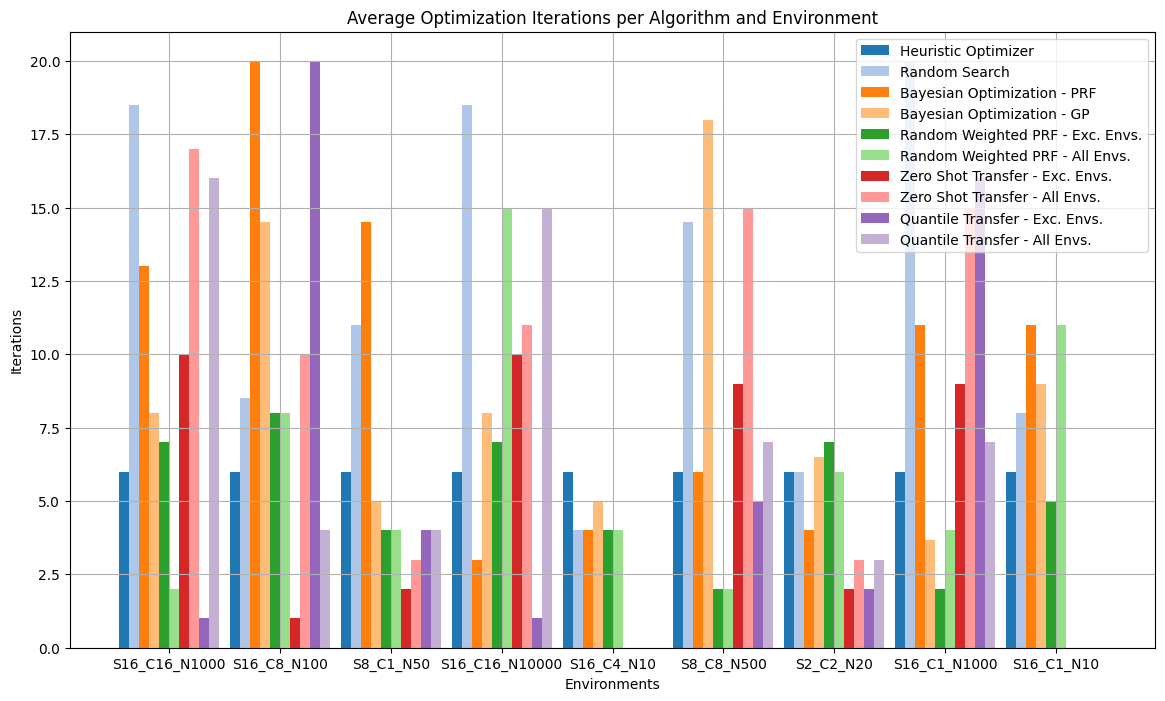

In [110]:
x = np.arange(9) # for 9 environments 

y_ho = [6,6,6,6,6,6,6,6,6] # it needs a contsnt number of 5 sample runs + 1 validation run to get to the runtime.
y_rs = dict_opt_times_avg["random_search_syne_tune"]
y_bo_prf = dict_opt_times_avg["bayesian_open_box"]
y_bo_gp = dict_opt_times_avg["bayesian_syne_tune"]
y_rgpe_exc = dict_opt_times_avg["open_box_transfer_exc"]
y_rgpe_all = dict_opt_times_avg["open_box_transfer_all"]
y_zst_exc = dict_opt_times_avg["zero_shot_transfer_exc"]
y_zst_all = dict_opt_times_avg["zero_shot_transfer_all"]
y_qnt_exc = dict_opt_times_avg["quantile_transfer_exc"]
y_qnt_all = dict_opt_times_avg["quantile_transfer_all"]


cmap = plt.colormaps['tab20']

width = 0.09
plt.figure(figsize=(14, 8))
# plot data in grouped manner of bar type 

plt.bar(x-(width * 4.5), y_ho, width, color=cmap(0)) 

plt.bar(x-(width * 3.5), y_rs, width, color=cmap(1)) 

plt.bar(x-(width * 2.5), y_bo_prf, width, color=cmap(2)) 

plt.bar(x-(width * 1.5), y_bo_gp, width, color=cmap(3)) 

plt.bar(x-(width * 0.5), y_rgpe_exc, width, color=cmap(4)) 



plt.bar(x+(width * 0.5), y_rgpe_all, width, color=cmap(5)) 

plt.bar(x+(width * 1.5), y_zst_exc, width, color=cmap(6)) 

plt.bar(x+(width * 2.5), y_zst_all, width, color=cmap(7))

plt.bar(x+(width * 3.5), y_qnt_exc, width, color=cmap(8))

plt.bar(x+(width * 4.5), y_qnt_all, width, color=cmap(9))

#plt.xticks(x, ['1', '2', '3', '4', '5', '6', '7', '8', '9']) 
plt.xticks(x, ["S16_C16_N1000", "S16_C8_N100", "S8_C1_N50", "S16_C16_N10000", "S16_C4_N10", "S8_C8_N500", "S2_C2_N20", "S16_C1_N1000", "S16_C1_N10"])

#plt.ylim([0, 2000]) 

plt.title("Average Optimization Iterations per Algorithm and Environment")
plt.xlabel("Environments") 
plt.ylabel("Iterations") 
plt.legend(["Heuristic Optimizer", "Random Search", 
            "Bayesian Optimization - PRF" , "Bayesian Optimization - GP", 
            "Random Weighted PRF - Exc. Envs.", "Random Weighted PRF - All Envs.", 
            "Zero Shot Transfer - Exc. Envs.", "Zero Shot Transfer - All Envs.",
            "Quantile Transfer - Exc. Envs.", "Quantile Transfer - All Envs."]) 
plt.grid()
plt.show() 